<a href="https://colab.research.google.com/github/MatheusRobles/Ex_Machine_Learn_I/blob/main/EX_Machine_Learn_Aula_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/MatheusRobles/Ex_Machine_Learn_I/main/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [18]:
unique_regions = df['region'].unique()
print(unique_regions)

['southwest' 'southeast' 'northwest' 'northeast']


In [13]:
encoded_df = pd.get_dummies(df, columns=['region'])
encoded_df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [31]:
from sklearn.model_selection import train_test_split


X = encoded_df.drop('smoker', axis=1)
y = encoded_df['smoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print("Dados de treino escalados:")
print(X_train_scaled[:5])
print("Dados de teste escalados:")
print(X_test_scaled[:5])

Dados de treino escalados:
[[ 0.47222651 -1.0246016  -1.75652513  0.73433626 -0.50874702 -0.57663083
   1.78316783 -0.59966106 -0.5723141 ]
 [ 0.54331294 -1.0246016  -1.03308239 -0.91119211 -0.50874702  1.73421182
  -0.56079971 -0.59966106 -0.5723141 ]
 [ 0.8987451  -1.0246016  -0.94368672 -0.91119211 -0.50874702 -0.57663083
  -0.56079971  1.66760869 -0.5723141 ]
 [-0.02537852 -1.0246016   0.62239299  3.20262882 -0.50874702 -0.57663083
  -0.56079971  1.66760869 -0.5723141 ]
 [ 1.04091797 -1.0246016  -1.50489287  1.55710045 -0.50874702 -0.57663083
   1.78316783 -0.59966106 -0.5723141 ]]
Dados de teste escalados:
[[ 0.40114007 -1.0246016  -0.89153925  0.73433626 -0.50874702  1.73421182
  -0.56079971 -0.59966106 -0.5723141 ]
 [-0.23863782 -1.0246016  -0.08946143 -0.91119211 -0.50874702 -0.57663083
   1.78316783 -0.59966106 -0.5723141 ]
 [ 1.75178229 -1.0246016  -0.60845296 -0.91119211  1.96561348 -0.57663083
   1.78316783 -0.59966106 -0.5723141 ]
 [ 0.47222651  0.97598911 -0.79717715  1.5

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Matriz de Confusão:")
print(confusion_matrix)
print("\nClassification Report:")
print(classification_report)

Matriz de Confusão:
[[214   0]
 [  0  54]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00        54

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



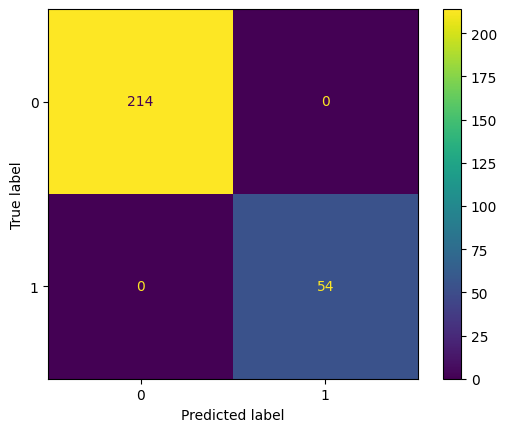

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()